# Day 6 – Ridge and LASSO Regularization

Goal: Visualize and interpret how Ridge and LASSO regularization techniques impact feature weights in a mission success prediction model.



## Load & Prepare Data

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

# Load and Preprocess Data 
df = pd.read_csv("/Users/amrithaa/Downloads/12DayDataSeries/notebooks/data/encoded_data.csv")
X = df.drop(columns=['mission_id', 'mission_success_score', 'mission_outcome'])
y = df['mission_success_score']

# Convert boolean features to integers
for col in X.select_dtypes(include=['bool']).columns:
    X[col] = X[col].astype(int)


## Generate Coefficients

In [2]:
alphas = np.logspace(-4, 2, 100)

ridge_coefs = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    ridge_coefs.append(ridge.coef_)

lasso_coefs = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X, y)
    lasso_coefs.append(lasso.coef_)

ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)

## Visualize the Results

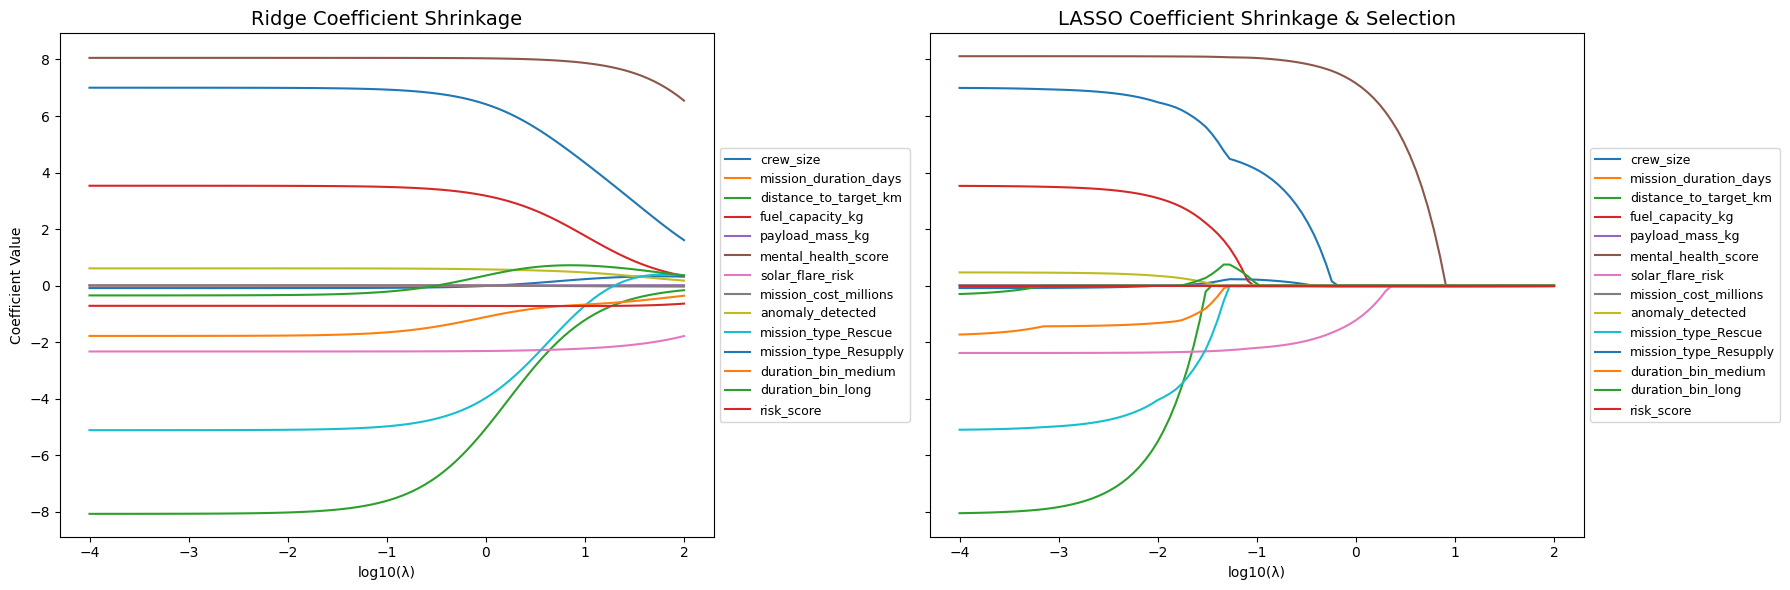

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Ridge
for i in range(len(X.columns)):
    axes[0].plot(np.log10(alphas), ridge_coefs[:, i], label=X.columns[i])
axes[0].set_title("Ridge Coefficient Shrinkage", fontsize=14)
axes[0].set_xlabel("log10(\u03bb)")
axes[0].set_ylabel("Coefficient Value")
axes[0].legend(fontsize=9, loc='center left', bbox_to_anchor=(1, 0.5))

# LASSO
for i in range(len(X.columns)):
    axes[1].plot(np.log10(alphas), lasso_coefs[:, i], label=X.columns[i])
axes[1].set_title("LASSO Coefficient Shrinkage & Selection", fontsize=14)
axes[1].set_xlabel("log10(\u03bb)")
axes[1].legend(fontsize=9, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

## Takeaways

- Ridge: All coefficients shrink smoothly toward zero as lambda increases, but none are eliminated.
 - LASSO: Some coefficients drop exactly to zero, which means LASSO is performing feature selection.
 - For mission prediction, LASSO can help isolate the most influential features (like mental health score, solar flare risk), while Ridge ensures all signals contribute, albeit less aggressively as lambda increases.
